# Supplementary Figures and Tables

In [1]:
import os
import numpy as np
import numpy.ma as ma
import pandas as pd
import iris
import matplotlib.pyplot as plt
os.environ["PROJ_LIB"] = "C:\\Utilities\\Python\\Anaconda\\Library\\share"; #fixr
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1 import make_axes_locatable
from textwrap import wrap
from src.ploter_functions import median_correlation_plot 
from src.ploter_functions import correlation_scatter_plot 
from src.ploter_functions import rmsd_icesheet_table 

In [2]:
results_figures_path = '/home/users/carter10/Antarctica_Climate_Variability/results/Paper_Figures/'

## Figures

### Spatial Correlation Multiple Components Plot

/home/users/carter10/.conda/envs/cordex-analysis-env/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


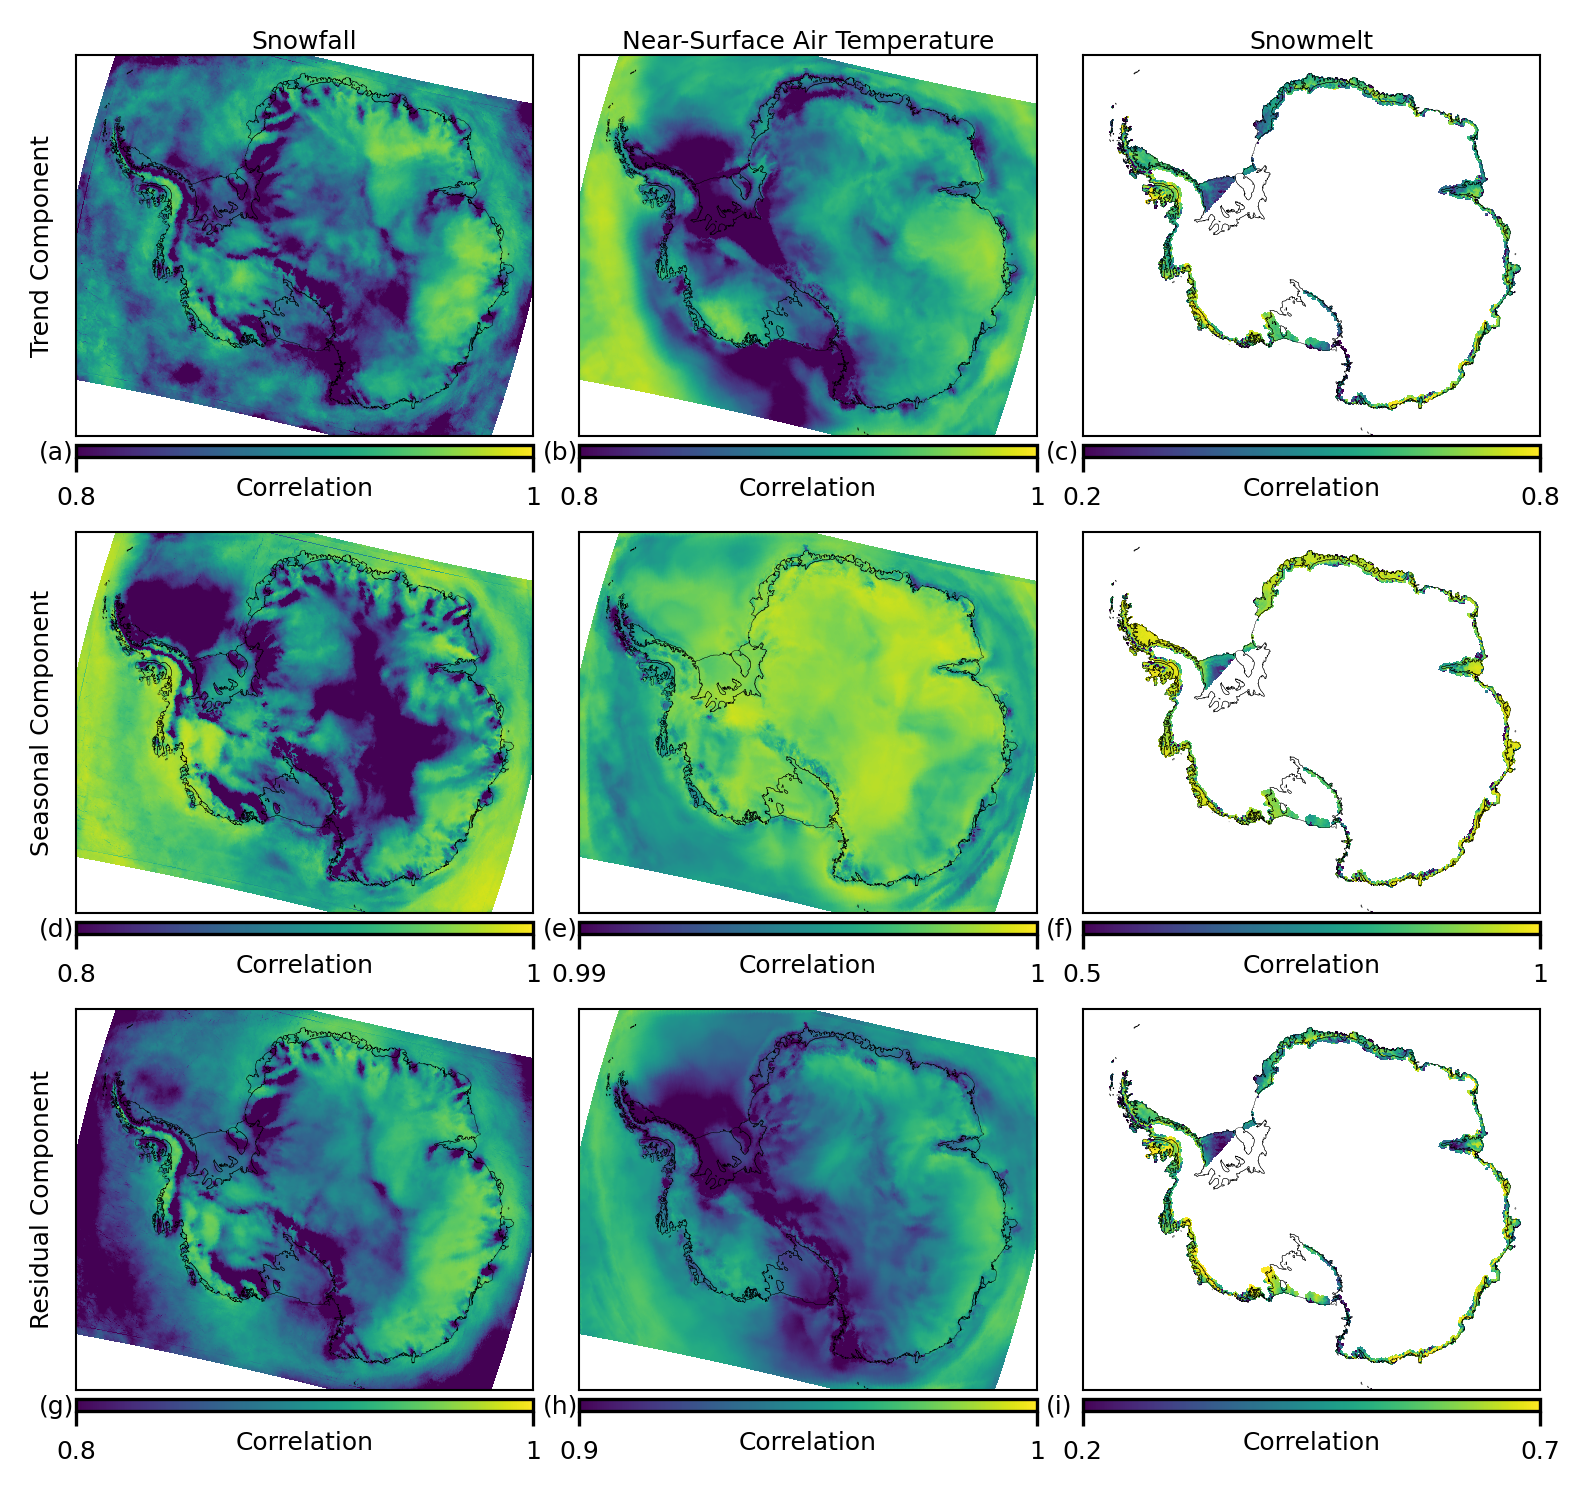

In [3]:
input_path = '/home/users/carter10/Shared_Storage/Antarctica_Climate_Variability/Ensemble_Array_Data/'
mask_path = '/home/users/carter10/Shared_Storage/Antarctica_Climate_Variability/Mask_Data/'
grid_cube_path = '/home/users/carter10/Shared_Storage/Antarctica_Climate_Variability/Postprocessed_Data/MetUM_011_ERA_INT_tas_2000.nc'
variables = ['snowfall','temperature','melt']
land_only_mask = np.load(f'{mask_path}metum011_grid_land_filter.npy')
mean_melt = np.load(f'{input_path}mean_melt.npy')
grid_cube = iris.load(grid_cube_path)[0][0]
subplot_dimensions = [3,3] 

antarctica_map = Basemap(width=6000000,height=5000000,projection='laea',lat_ts=-55,lat_0=-90,lon_0=0,resolution='l')
cm = 1/2.54  # centimeters in inches
fig, ax = plt.subplots(subplot_dimensions[0], subplot_dimensions[1], sharex='col', sharey='row',figsize=(16*cm, 16*cm),dpi= 300)
fig.subplots_adjust(hspace=0.01, wspace=0.1)

plots = []
plt_numbers_list = [[1,2,3],[4,5,6],[7,8,9]]
vmins_list = [[0.8,0.8,0.2],[0.8,0.99,0.5],[0.8,0.9,0.2]]
vmaxs_list = [[1,1,0.8],[1,1,1],[1,1,0.7]]

component = [0] # 0=Trend component, 1=Seasonal component, 2=Residual component
plots.append(median_correlation_plot(input_path,variables,component,land_only_mask,mean_melt,antarctica_map,grid_cube,subplot_dimensions,plt_numbers_list[0],vmins_list[0],vmaxs_list[0])) 
component = [1] # 0=Trend component, 1=Seasonal component, 2=Residual component
plots.append(median_correlation_plot(input_path,variables,component,land_only_mask,mean_melt,antarctica_map,grid_cube,subplot_dimensions,plt_numbers_list[1],vmins_list[1],vmaxs_list[1])) 
component = [2] # 0=Trend component, 1=Seasonal component, 2=Residual component
plots.append(median_correlation_plot(input_path,variables,component,land_only_mask,mean_melt,antarctica_map,grid_cube,subplot_dimensions,plt_numbers_list[2],vmins_list[2],vmaxs_list[2])) 
       
axes = plt.gcf().get_axes()

title_height = 0.95
for axis,label in zip(axes,['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)','(i)']):
    [x.set_linewidth(0.5) for x in axis.spines.values()] #Setting border line width
    axis.annotate(label,xy=(-0.08,-0.06),xycoords='axes fraction',fontsize=6) # Setting labels
label_height = .01
for axis,title in zip(axes,['Snowfall','Near-Surface Air Temperature','Snowmelt']):
    axis.set_title(title,loc='center',y=title_height,fontsize=6)#,weight='bold') # Setting column titles
row_xy = [-0.1,0.5]    
for axis,rowtitle in zip(plt.gcf().get_axes()[::3],['Trend Component','Seasonal Component','Residual Component']):
    axis.annotate(rowtitle,xy=(row_xy[0],row_xy[1]),xycoords='axes fraction',fontsize=6,rotation=90,va='center')#,weight='bold') # Setting row titles

plots = [item for sublist in plots for item in sublist]
vmins_list = [item for sublist in vmins_list for item in sublist]
vmaxs_list = [item for sublist in vmaxs_list for item in sublist]
    
for plot,axis,vmin,vmax in zip(plots,axes,vmins_list,vmaxs_list):
    divider = make_axes_locatable(axis)
    cax = divider.append_axes('bottom', size='3%', pad=0.03)
    cbar = plt.colorbar(plot,cax=cax,orientation="horizontal")
    cbar.set_ticks([vmin, vmax])
    cbar.ax.set_xticklabels([f'{vmin}', f'{vmax}'],fontsize=6)
    colorbar_label = "\n".join(wrap('Correlation', 100))
    cbar.set_label(colorbar_label,labelpad=-8,fontsize=6)

# fig.savefig(f'{results_figures_path}Figure_2.png',dpi=300,bbox_inches='tight')

### Matrix Correlation Multiple Components Plot

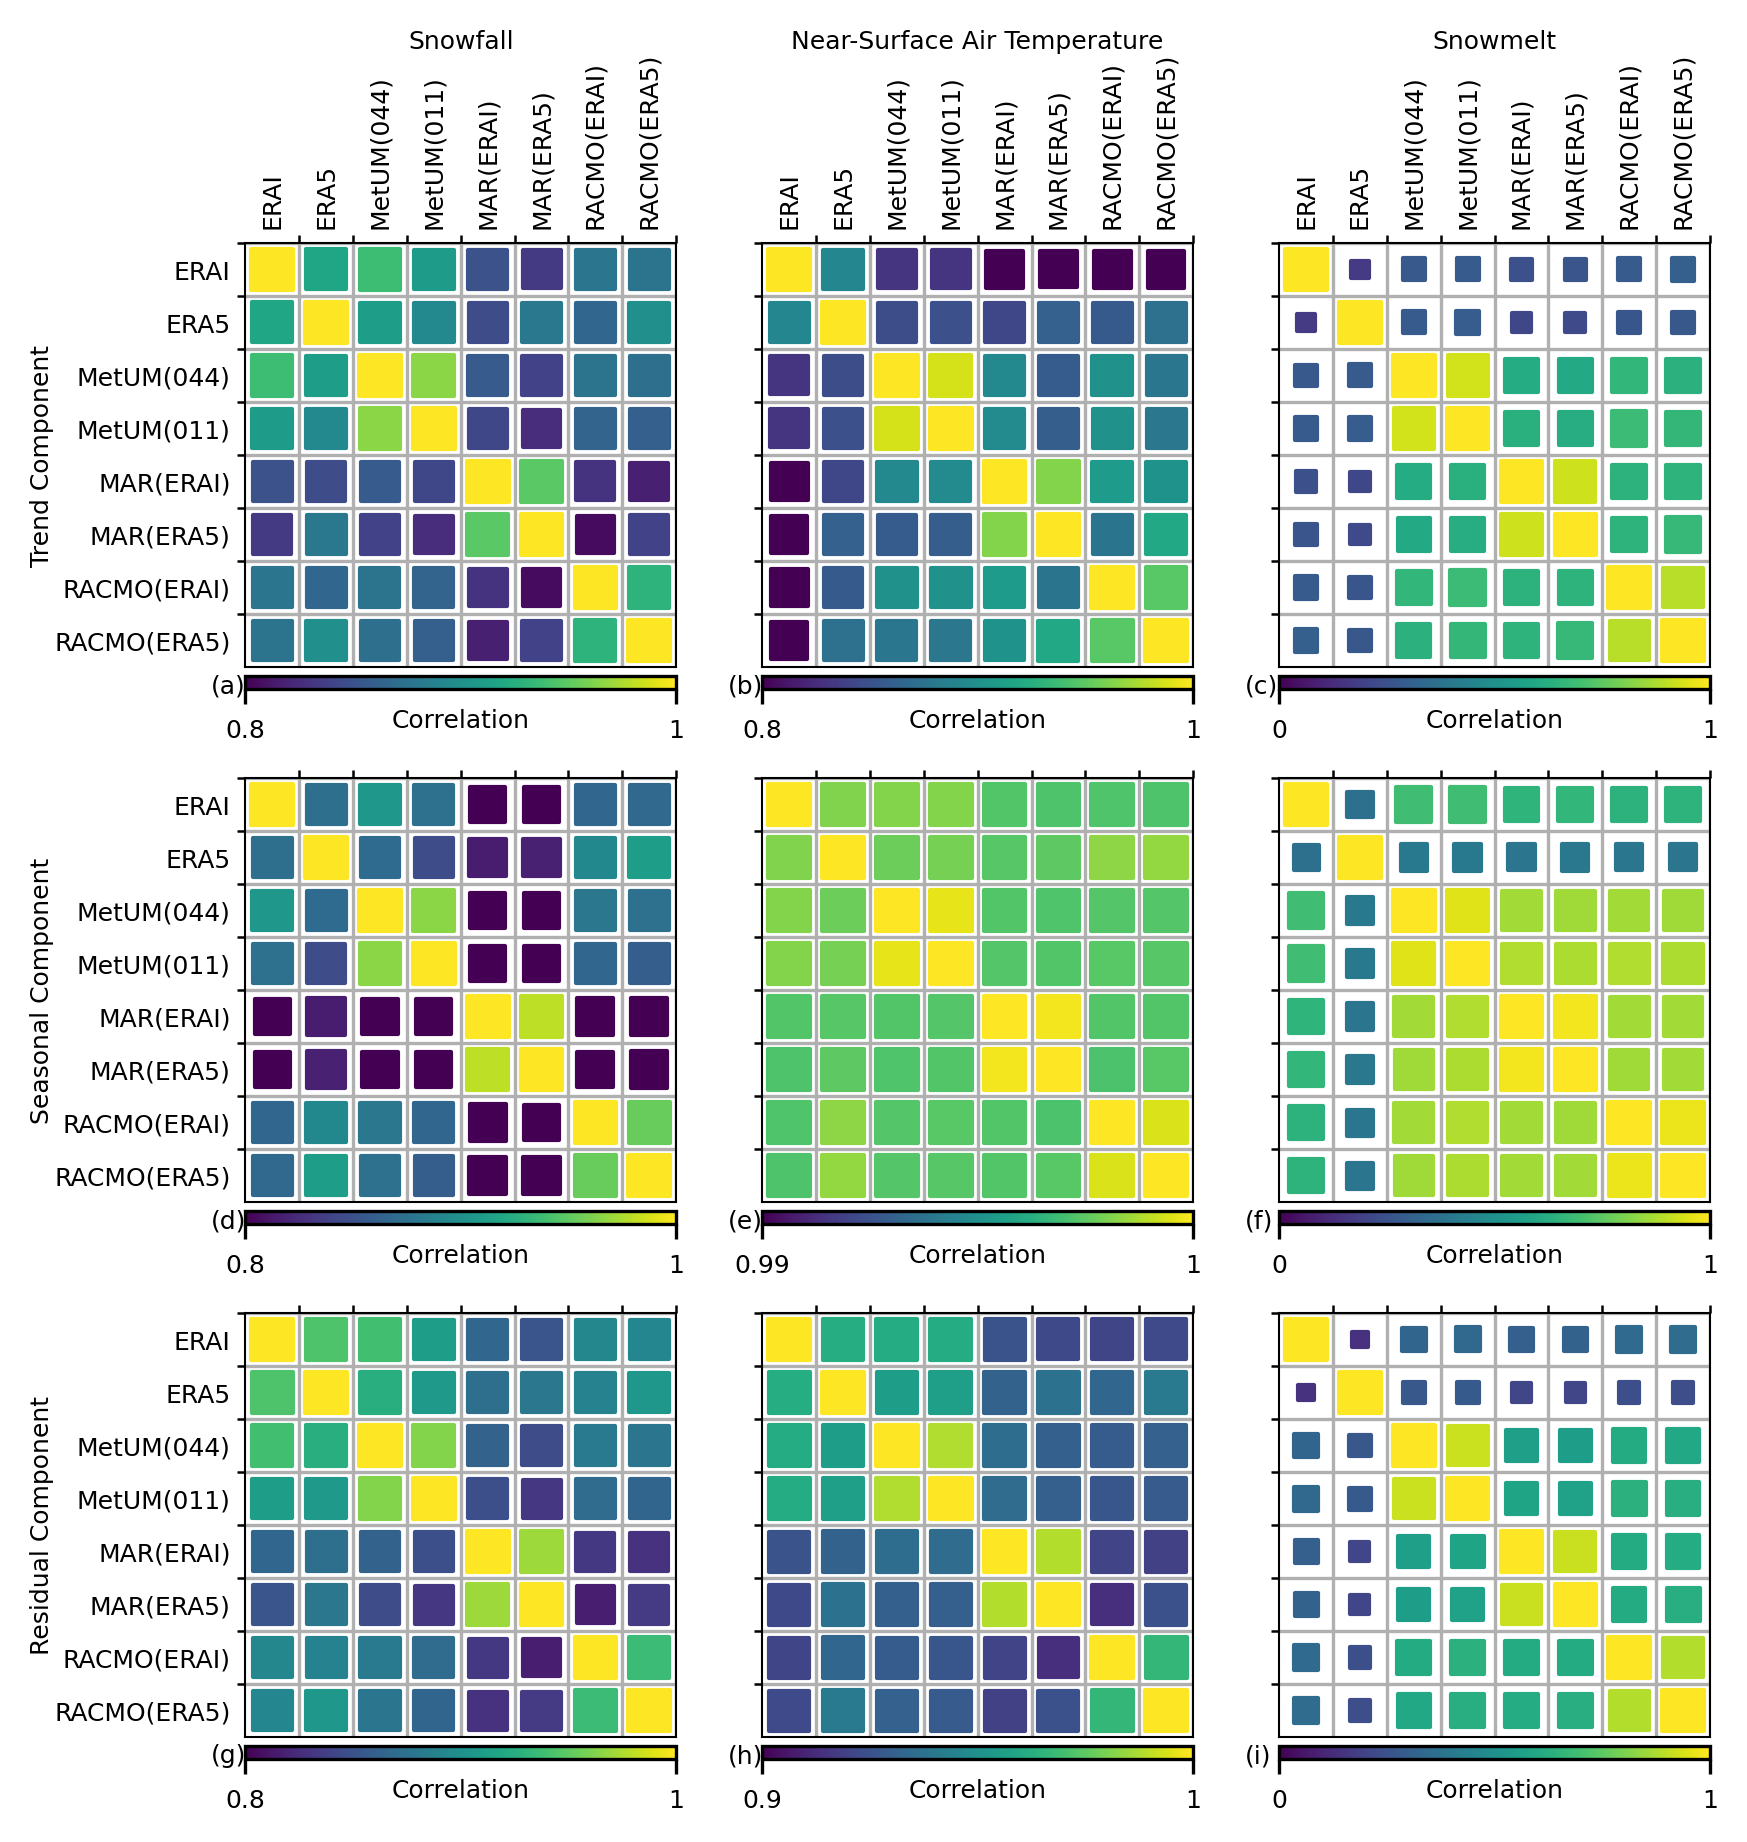

In [4]:
input_path = '/home/users/carter10/Shared_Storage/Antarctica_Climate_Variability/Ensemble_Array_Data/'
mask_path = '/home/users/carter10/Shared_Storage/Antarctica_Climate_Variability/Mask_Data/'
grid_cube_path = '/home/users/carter10/Shared_Storage/Antarctica_Climate_Variability/Postprocessed_Data/MetUM_011_ERA_INT_tas_2000.nc'
variables = ['snowfall','temperature','melt']
land_only_mask = np.load(f'{mask_path}metum011_grid_land_filter.npy')
mean_melt = np.load(f'{input_path}mean_melt.npy')
grid_cube = iris.load(grid_cube_path)[0][0]
subplot_dimensions = [3,3]

antarctica_map = Basemap(width=6000000,height=5000000,projection='laea',lat_ts=-55,lat_0=-90,lon_0=0,resolution='l')
cm = 1/2.54  # centimeters in inches
fig, ax = plt.subplots(subplot_dimensions[0], subplot_dimensions[1], sharex='col', sharey='row',figsize=(16*cm, 17.0*cm),dpi= 300)
fig.subplots_adjust(hspace=0.2, wspace=0.2)

scale=100
models = ['ERAI','ERA5','MetUM(044)','MetUM(011)','MAR(ERAI)','MAR(ERA5)', 'RACMO(ERAI)','RACMO(ERA5)']  
model_numbers = np.array([0,1,2,3,4,5,6,7])
fontsize=6
vmaxs = [1,1,1,1,1,1,1,1,1]

plots = []
plt_numbers_list = [[1,2,3],[4,5,6],[7,8,9]]
vmins_list = [[0.8,0.8,0],[0.8,0.99,0],[0.8,0.9,0]]

component = [0] # 0=Trend component, 1=Seasonal component, 2=Residual component
plots.append(correlation_scatter_plot(input_path,variables,component,land_only_mask,mean_melt,subplot_dimensions,plt_numbers_list[0],scale,vmins_list[0]))
component = [1] # 0=Trend component, 1=Seasonal component, 2=Residual component
plots.append(correlation_scatter_plot(input_path,variables,component,land_only_mask,mean_melt,subplot_dimensions,plt_numbers_list[1],scale,vmins_list[1]))
component = [2] # 0=Trend component, 1=Seasonal component, 2=Residual component
plots.append(correlation_scatter_plot(input_path,variables,component,land_only_mask,mean_melt,subplot_dimensions,plt_numbers_list[2],scale,vmins_list[2]))

axes = plt.gcf().get_axes()

counter = 0
for axis in axes:
    axis.set_xticks(model_numbers)
    axis.set_xticklabels([])
    axis.xaxis.tick_top() # setting x axis to top of graph
    axis.set_yticks(model_numbers)
    axis.set_yticklabels([])
    
    if counter in [0,3,6]:
        axis.set_yticklabels(np.flip(models),fontsize=fontsize)
    if counter in [0,1,2]:
        axis.set_xticklabels(models, rotation=90,fontsize=fontsize)
        
    axis.tick_params(which='major', length=0)
    axis.grid(False, 'major')
    axis.grid(True, 'minor')
    axis.set_xticks(axis.get_xticks()+0.5, minor=True)
    axis.set_yticks(axis.get_yticks()+0.5, minor=True)
    axis.set_xlim([-0.5, 7.5]) 
    axis.set_ylim([-0.5, 7.5])
        
    counter+=1
    
plots = [item for sublist in plots for item in sublist]
vmins_list = [item for sublist in vmins_list for item in sublist]
    
for plot,axis,vmin,vmax in zip(plots,axes,vmins_list,vmaxs):
    divider = make_axes_locatable(axis)
    cax = divider.append_axes('bottom', size='3%', pad=0.03)
    cbar = plt.colorbar(plot,cax=cax,orientation="horizontal")
    cbar.set_ticks([vmin, vmax])
    cbar.ax.set_xticklabels([f'{vmin}', f'{vmax}'],fontsize=6)
    colorbar_label = "\n".join(wrap('Correlation', 100))
    cbar.set_label(colorbar_label,labelpad=-8,fontsize=6)

title_height = 1.4
for axis,label in zip(axes,['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)','(i)']):
    [x.set_linewidth(0.5) for x in axis.spines.values()] #Setting border line width
    axis.annotate(label,xy=(-0.08,-0.06),xycoords='axes fraction',fontsize=6) # Setting labels
label_height = .01
for axis,title in zip(axes,['Snowfall','Near-Surface Air Temperature','Snowmelt']):
    axis.set_title(title,loc='center',y=title_height,fontsize=6)#,weight='bold') # Setting column titles
row_xy = [-0.5,0.5]    
for axis,rowtitle in zip(plt.gcf().get_axes()[::3],['Trend Component','Seasonal Component','Residual Component']):
    axis.annotate(rowtitle,xy=(row_xy[0],row_xy[1]),xycoords='axes fraction',fontsize=6,rotation=90,va='center')#,weight='bold') # Setting row titles

plt.show()
# fig.savefig(f'{results_figures_path}Figure_3.png',dpi=300,bbox_inches='tight')

## Tables

### RMSD Total Ice Sheet Table

In [5]:
input_path = '/home/users/carter10/Shared_Storage/Antarctica_Climate_Variability/Ensemble_Array_Data/'
variables = ['temperature','snowfall','melt']
rmsd_icesheet_table(input_path,variables)

RMSD Average Ice Sheet Wide Near-Surface Air Temperature / K


,ERAI,ERA5,MetUM(044),MetUM(011),MAR(ERAI),MAR(ERA5),RACMO(ERAI),RACMO(ERA5)
ERAI,0.0,1.5,1.7,1.4,0.6,0.7,1.5,1.3
ERA5,1.5,0.0,1.8,1.6,1.5,1.5,1.3,1.1
MetUM(044),1.7,1.8,0.0,0.3,2.1,2.1,0.8,0.9
MetUM(011),1.4,1.6,0.3,0.0,1.8,1.8,0.7,0.8
MAR(ERAI),0.6,1.5,2.1,1.8,0.0,0.2,1.8,1.6
MAR(ERA5),0.7,1.5,2.1,1.8,0.2,0.0,1.8,1.6
RACMO(ERAI),1.5,1.3,0.8,0.7,1.8,1.8,0.0,0.3
RACMO(ERA5),1.3,1.1,0.9,0.8,1.6,1.6,0.3,0.0


RMSD Total Ice Sheet Wide Snowfall / GT


,ERAI,ERA5,MetUM(044),MetUM(011),MAR(ERAI),MAR(ERA5),RACMO(ERAI),RACMO(ERA5)
ERAI,0.0,48.4,34.5,44.9,58.2,59.1,51.9,53.5
ERA5,48.4,0.0,17.2,12.3,15.8,15.3,11.1,9.5
MetUM(044),34.5,17.2,0.0,10.7,28.4,29.4,19.9,21.4
MetUM(011),44.9,12.3,10.7,0.0,22.5,23.4,12.3,13.6
MAR(ERAI),58.2,15.8,28.4,22.5,0.0,6.2,17.3,16.0
MAR(ERA5),59.1,15.3,29.4,23.4,6.2,0.0,17.9,15.5
RACMO(ERAI),51.9,11.1,19.9,12.3,17.3,17.9,0.0,6.6
RACMO(ERA5),53.5,9.5,21.4,13.6,16.0,15.5,6.6,0.0


RMSD Total Ice Sheet Wide Melt / GT


,ERAI,ERA5,MetUM(044),MetUM(011),MAR(ERAI),MAR(ERA5),RACMO(ERAI),RACMO(ERA5)
ERAI,0.0,31.5,8.7,8.0,9.7,8.9,14.6,14.6
ERA5,31.5,0.0,27.7,29.2,25.0,25.3,19.9,19.4
MetUM(044),8.7,27.7,0.0,1.7,5.9,5.9,9.3,9.7
MetUM(011),8.0,29.2,1.7,0.0,6.8,6.7,10.7,11.1
MAR(ERAI),9.7,25.0,5.9,6.8,0.0,2.1,7.6,7.8
MAR(ERA5),8.9,25.3,5.9,6.7,2.1,0.0,7.9,7.8
RACMO(ERAI),14.6,19.9,9.3,10.7,7.6,7.9,0.0,2.0
RACMO(ERA5),14.6,19.4,9.7,11.1,7.8,7.8,2.0,0.0
